In [1]:
%cd /content/drive/My Drive/BIO/xrays

/content/drive/My Drive/BIO/xrays


In [2]:
!nvidia-smi

Fri Nov 13 14:00:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    33W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
device = tf.test.gpu_device_name()
device

'/device:GPU:0'

In [4]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

import matplotlib.pyplot as plt

In [5]:
!ls

imgs		    test_mass		 train_emphysema  valid_consolidation
models		    test_nodule		 train_mass	  valid_edema
test_all	    test_pneumonia	 train_nodule	  valid_emphysema
test_consolidation  train_all		 train_pneumonia  valid_mass
test_edema	    train_consolidation  Untitled0.ipynb  valid_nodule
test_emphysema	    train_edema		 valid_all	  valid_pneumonia


In [6]:
dis = 'pneumonia'

In [7]:
trdata = ImageDataGenerator()
#traindata = trdata.flow_from_directory(directory="PA_AP_train_v4",target_size=(275, 220))
traindata = trdata.flow_from_directory(
    directory="train_{}".format(dis),
    target_size=(625, 500),
    batch_size=32,
    class_mode='categorical'
)

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(
    directory="test_{}".format(dis),
    target_size=(625, 500),
    batch_size=32,
    class_mode='categorical'
)

vddata = ImageDataGenerator()
validdata = vddata.flow_from_directory(
    directory="valid_{}".format(dis),
    target_size=(625, 500),
    batch_size=32,
    class_mode='categorical'
)

Found 1678 images belonging to 2 classes.
Found 335 images belonging to 2 classes.
Found 225 images belonging to 2 classes.


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(625, 500, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 625, 500, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 625, 500, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 625, 500, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 625, 500, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 208, 166, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 208, 166, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 208, 166, 64)      1

In [10]:
# opt = Adam(lr=0.0001)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
'''
model = Sequential()
model.add(Conv2D(input_shape=(275, 220,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))
'''
''

''

In [ ]:
#model.summary()

In [ ]:
'''
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])
'''
''

''

In [11]:
!nvidia-smi

Fri Nov 13 14:00:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    33W /  70W |    359MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
dis

'pneumonia'

In [13]:
hist = model.fit(
    traindata, 
    validation_data=testdata,
    epochs=4
)

Epoch 1/4
53/53 [==============================] - 956s 18s/step - loss: 0.7779 - accuracy: 0.5965 - val_loss: 0.6055 - val_accuracy: 0.7761
Epoch 2/4
53/53 [==============================] - 40s 750ms/step - loss: 0.4092 - accuracy: 0.8772 - val_loss: 0.4494 - val_accuracy: 0.9403
Epoch 3/4
53/53 [==============================] - 38s 726ms/step - loss: 0.2931 - accuracy: 0.9225 - val_loss: 0.3651 - val_accuracy: 0.9403
Epoch 4/4
53/53 [==============================] - 39s 738ms/step - loss: 0.2451 - accuracy: 0.9434 - val_loss: 0.2964 - val_accuracy: 0.9403


In [14]:
# evaluar modelo
# v1
acc = model.evaluate_generator(validdata)
print("Loss: ", acc[0], "Accuracy: ", acc[1])
print('> %.3f' % (acc[1] * 100.0))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Loss:  0.30336254835128784 Accuracy:  0.9333333373069763
> 93.333


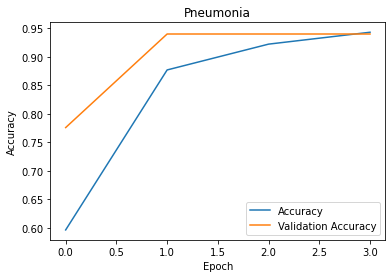

In [18]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("{}".format(dis).capitalize())
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.savefig("imgs/{}_acc.png".format(dis))
plt.show()

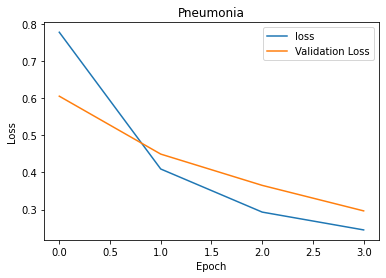

In [19]:
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("{}".format(dis).capitalize())
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.savefig("imgs/{}_loss.png".format(dis))
plt.show()

In [20]:
model.save("models/{}_625_500_v5.h5".format(dis))

In [ ]:
# evaluar modelo
# v2
acc = model.evaluate_generator(validdata)
print("Loss: ", acc[0], "Accuracy: ", acc[1])
print('> %.3f' % (acc[1] * 100.0))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Loss:  0.6300597190856934 Accuracy:  0.6816608905792236
> 68.166


In [ ]:
# evaluar modelo
# v3
acc = model.evaluate_generator(validdata)
print("Loss: ", acc[0], "Accuracy: ", acc[1])
print('> %.3f' % (acc[1] * 100.0))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Loss:  0.8275204300880432 Accuracy:  0.6193771362304688
> 61.938


In [ ]:
# evaluar modelo
# v4
acc = model.evaluate_generator(validdata)
print("Loss: ", acc[0], "Accuracy: ", acc[1])
print('> %.3f' % (acc[1] * 100.0))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Loss:  0.8140664100646973 Accuracy:  0.633217990398407
> 63.322


In [ ]:
# evaluar modelo
# v5
acc = model.evaluate_generator(validdata)
print("Loss: ", acc[0], "Accuracy: ", acc[1])
print('> %.3f' % (acc[1] * 100.0))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Loss:  0.6412392854690552 Accuracy:  0.6816608905792236
> 68.166


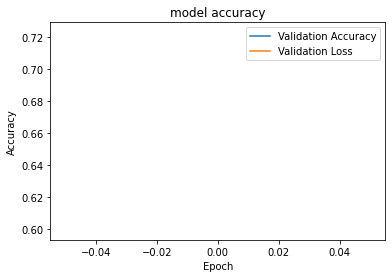

In [ ]:
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
# plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.legend(["Validation Accuracy","Validation Loss"])
plt.show()

In [ ]:
!nvidia-smi

Sun Nov  1 06:49:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    33W /  70W |  14575MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
model.save("model_pa_ap.h5")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()